In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [8]:
import sys

python_exe = sys.executable
print(python_exe)

!"{python_exe}" -m pip uninstall numpy -y
!"{python_exe}" -m pip install "numpy<2"


c:\Users\yasht\.anaconda\anaconda 4\python.exe
Found existing installation: numpy 2.4.0
Uninstalling numpy-2.4.0:
  Successfully uninstalled numpy-2.4.0


You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.33.2 which is incompatible.


In [1]:
import plotly.express as px
print("Plotly OK")


Plotly OK


In [3]:
df = pd.read_csv(r"C:\Users\yasht\Downloads\E Commerce sales project\ecommerce_sales_large.csv")

In [5]:
df = df.drop_duplicates()
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,555795,22960,Jam Making Set With Jars,33,20-07-2023 07:12,5.47,13708,United Kingdom
1,540860,84406B,Cream Cupid Hearts Coat Hanger,7,22-09-2023 01:25,1.32,17085,United Kingdom
2,545390,20727,Lunch Bag Black Skull,10,06-07-2023 07:09,1.42,15693,France
3,551964,20725,Lunch Bag Red Retrospot,8,16-10-2023 12:26,2.60,13947,United Kingdom
4,551284,22745,Poppy’s Playhouse Bedroom,32,27-12-2023 04:15,4.78,16241,United Kingdom
...,...,...,...,...,...,...,...,...
9995,551260,22961,Jam Making Set Printed,33,19-04-2023 23:30,1.31,14325,United Kingdom
9996,558563,22633,Hand Warmer Red Polka Dot,15,12-07-2023 06:11,1.73,12905,United Kingdom
9997,540634,22961,Jam Making Set Printed,24,07-12-2023 20:33,2.69,14549,Germany
9998,550057,84406B,Cream Cupid Hearts Coat Hanger,36,14-06-2023 20:26,3.86,12992,United Kingdom


In [6]:
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id       int64
country          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_no    10000 non-null  object 
 1   stock_code    10000 non-null  object 
 2   description   10000 non-null  object 
 3   quantity      10000 non-null  int64  
 4   invoice_date  10000 non-null  object 
 5   unit_price    10000 non-null  float64
 6   customer_id   10000 non-null  int64  
 7   country       10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [8]:
df.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

to create a new column

In [10]:
df["revenue"] = df["quantity"] * df["unit_price"]
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue
0,555795,22960,Jam Making Set With Jars,33,20-07-2023 07:12,5.47,13708,United Kingdom,180.51
1,540860,84406B,Cream Cupid Hearts Coat Hanger,7,22-09-2023 01:25,1.32,17085,United Kingdom,9.24
2,545390,20727,Lunch Bag Black Skull,10,06-07-2023 07:09,1.42,15693,France,14.20
3,551964,20725,Lunch Bag Red Retrospot,8,16-10-2023 12:26,2.60,13947,United Kingdom,20.80
4,551284,22745,Poppy’s Playhouse Bedroom,32,27-12-2023 04:15,4.78,16241,United Kingdom,152.96
...,...,...,...,...,...,...,...,...,...
9995,551260,22961,Jam Making Set Printed,33,19-04-2023 23:30,1.31,14325,United Kingdom,43.23
9996,558563,22633,Hand Warmer Red Polka Dot,15,12-07-2023 06:11,1.73,12905,United Kingdom,25.95
9997,540634,22961,Jam Making Set Printed,24,07-12-2023 20:33,2.69,14549,Germany,64.56
9998,550057,84406B,Cream Cupid Hearts Coat Hanger,36,14-06-2023 20:26,3.86,12992,United Kingdom,138.96


First business insight

In [11]:
df.groupby("country")["revenue"].sum().sort_values(ascending = False).head(10)

country
United Kingdom    374383.88
Germany            63453.28
France             58925.80
Spain              44353.97
Netherlands        32712.55
Italy              23407.21
Belgium            13507.07
Portugal           12716.62
Name: revenue, dtype: float64

In [13]:
df[df["country"] == "United Kingdom"]["revenue"].sum()


374383.88

In [14]:
df[df["country"] == "United Kingdom"]["quantity"].sum()


110874

plotly chart

In [17]:
import plotly.express as px

daily_rev = (
    df.assign(date=pd.to_datetime(df["invoice_date"]).dt.date)
      .groupby("date")["revenue"]
      .sum()
      .reset_index()
)

fig = px.line(
    daily_rev,
    x="date",
    y="revenue",
    title="Daily Revenue Trend"
)
fig.show()


C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\3349757167.py:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



data cleaning

In [18]:
df["is_cancelled"] = df["invoice_no"].astype(str).str.startswith("C")


In [19]:
df["is_cancelled"].value_counts()


is_cancelled
False    9486
True      514
Name: count, dtype: int64

In [20]:
df[["quantity", "unit_price"]].describe()


,quantity,unit_price
count,10000.00000,10000.000000
mean,18.58620,3.345902
std,12.28947,1.245025
min,-9.00000,1.200000
25%,8.00000,2.270000
50%,19.00000,3.330000
75%,29.00000,4.440000
max,39.00000,5.500000


In [21]:
sales_df = df[
    (~df["is_cancelled"]) &
    (df["quantity"] > 0) &
    (df["unit_price"] > 0)
]

returns_df = df[
    (df["is_cancelled"]) |
    (df["quantity"] < 0)
]


In [26]:
sales_df["invoice_date"] = pd.to_datetime(sales_df["invoice_date"])



C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\982446956.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
sales_df["date"] = sales_df["invoice_date"].dt.date
sales_df["month"] = sales_df["invoice_date"].dt.to_period("M")

C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\2807158646.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\2807158646.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
sales_df.duplicated().sum()


0

In [24]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9486 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    9486 non-null   object        
 1   stock_code    9486 non-null   object        
 2   description   9486 non-null   object        
 3   quantity      9486 non-null   int64         
 4   invoice_date  9486 non-null   datetime64[ns]
 5   unit_price    9486 non-null   float64       
 6   customer_id   9486 non-null   int64         
 7   country       9486 non-null   object        
 8   revenue       9486 non-null   float64       
 9   is_cancelled  9486 non-null   bool          
 10  date          9486 non-null   object        
 11  month         9486 non-null   period[M]     
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5), period[M](1)
memory usage: 898.6+ KB


In [28]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,is_cancelled
0,555795,22960,Jam Making Set With Jars,33,20-07-2023 07:12,5.47,13708,United Kingdom,180.51,False
1,540860,84406B,Cream Cupid Hearts Coat Hanger,7,22-09-2023 01:25,1.32,17085,United Kingdom,9.24,False
2,545390,20727,Lunch Bag Black Skull,10,06-07-2023 07:09,1.42,15693,France,14.20,False
3,551964,20725,Lunch Bag Red Retrospot,8,16-10-2023 12:26,2.60,13947,United Kingdom,20.80,False
4,551284,22745,Poppy’s Playhouse Bedroom,32,27-12-2023 04:15,4.78,16241,United Kingdom,152.96,False
...,...,...,...,...,...,...,...,...,...,...
9995,551260,22961,Jam Making Set Printed,33,19-04-2023 23:30,1.31,14325,United Kingdom,43.23,False
9996,558563,22633,Hand Warmer Red Polka Dot,15,12-07-2023 06:11,1.73,12905,United Kingdom,25.95,False
9997,540634,22961,Jam Making Set Printed,24,07-12-2023 20:33,2.69,14549,Germany,64.56,False
9998,550057,84406B,Cream Cupid Hearts Coat Hanger,36,14-06-2023 20:26,3.86,12992,United Kingdom,138.96,False


eda

In [29]:
sales_df["invoice_date"] = pd.to_datetime(sales_df["invoice_date"])


C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\1406976532.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
sales_df["date"] = sales_df["invoice_date"].dt.date
sales_df["month"] = sales_df["invoice_date"].dt.to_period("M")
sales_df["weekday"] = sales_df["invoice_date"].dt.day_name()
sales_df["hour"] = sales_df["invoice_date"].dt.hour


C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\3754675020.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\3754675020.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yasht\AppData\Local\Temp\ipykernel_14288\3754675020.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

daily revenue

In [31]:
daily_revenue =(sales_df.groupby ("date")["revenue"] .sum()
    .reset_index()
)



In [32]:
import plotly.express as px

px.line(
    daily_revenue,
    x="date",
    y="revenue",
    title="Daily Revenue Trend"
)


monthly revenue

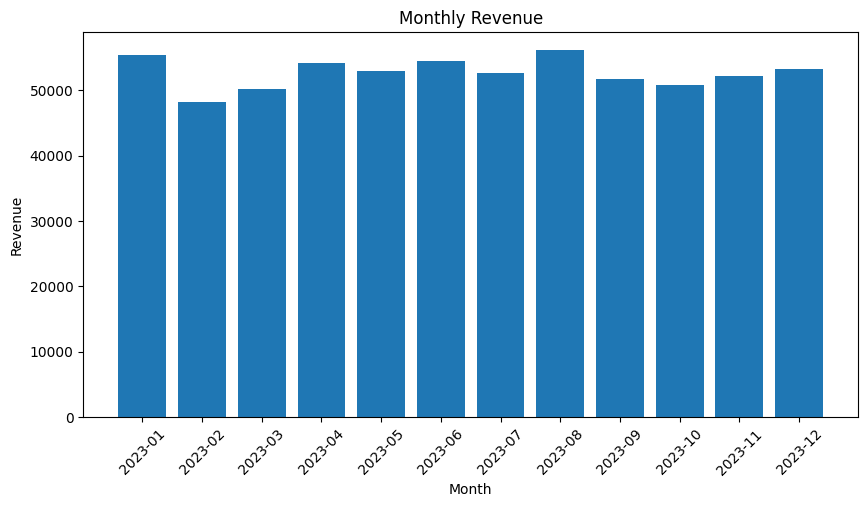

In [36]:
import matplotlib.pyplot as plt

monthly_revenue = (
    sales_df.groupby("month")["revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.bar(monthly_revenue["month"].astype(str), monthly_revenue["revenue"])
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


Order Volume Over Time

Revenue alone can mislead. Check order count.

In [38]:
daily_orders = (
    sales_df.groupby("date")["invoice_no"]
    .nunique()
    .reset_index(name="order_count")
)

px.line(
    daily_orders,
    x="date",
    y="order_count",
    title="Daily Order Volume"
)


customer analysis 

In [39]:
sales_df["customer_id"].nunique()


4711

In [40]:
sales_df["customer_id"].isna().sum()


0

Revenue per Customer

In [41]:
customer_revenue = (
    sales_df.groupby("customer_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
customer_revenue.head(10)


,customer_id,revenue
0,13460,639.31
1,13822,616.55
2,12375,588.43
3,12555,579.26
4,14082,571.71
5,16816,559.67
6,16534,547.19
7,17749,543.72
8,15928,541.55
9,16349,539.33
